# DBSCAN 

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm used as an alternative to K-means in predictive analytics. 

Points to be noted about:

  1. The Algorithm doese not require the user to input the number of cluster.  
  2. The algorithm is tuned using two parameters epsilon and min_samples, where eps is the maximum distance between two data points to be considered in the same neighborhood. The min_samples is the minimum amount of data points in a neighborhood to be formed in a cluster.

Keep in mind, however, that the algorithm depends on the eps and min_samples parameters to figure out what the density of each cluster should be. The thinking is that these two parameters are much easier to choose for some clustering problems.

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

The above two statements load the iris dataset. Now lets create an instance of DBSCAN using the following code.

In [4]:
from sklearn.cluster import DBSCAN
# dbscan = DBSCAN(random_state=111)
dbscan = DBSCAN()

The first line of code imports the DBSCAN library into the session for you to use. The second line creates an instance of DBSCAN with default values for eps and min_samples.


In [5]:
dbscan

DBSCAN()

The dbscan is initializeds with default eps, min_samples paramenters. The same can be seen in the above.
Now lets load the iris dataset into DBSCAN clusterning algorithm

In [6]:
dbscan.fit(iris.data)

DBSCAN()

The above line fits the IRIS datset to DBSCAN algorithm and forms the clusters. We can check the cluster labels using the following command

In [7]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

Analysing the above output reavelas that DBSCAN fit 3 clusters to the IRIS dataset.

## Visualizing the clusters

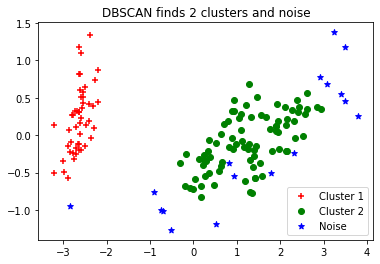

In [8]:
import matplotlib.pyplot as pl
%matplotlib inline  

from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(iris.data)
pca_2d = pca.transform(iris.data)
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
            c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    elif dbscan.labels_[i] == 1:
            c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
    elif dbscan.labels_[i] == -1:
            c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')
pl.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2',
    'Noise'])
pl.title('DBSCAN finds 2 clusters and noise')
pl.show()

DBSCAN produced three groups. 

**Exercise** You can increase the distance parameter (eps) from the default setting of 0.5 to 0.9, and it will become a two-cluster solution with no noise.

The distance parameter is the maximum distance an observation is to the nearest cluster. The greater the value for the distance parameter, the fewer clusters are found because clusters eventually merge into other clusters.